in the container 
run this in a terminal before you start the notebook 

pip install --user healpy
pip install --user --upgrade astropy
pip install --user --upgrade numpy
pip install --user --upgrade scipy

path to the data

workspace/Temporary/MaraSalvato/AGN_F2F_VOLUME/JohanComparat/


Predict the number of pairs as a function of angular separation at low redshift
--------------------------------------

a. AGN-AGN 

b. AGN-CLUSTER

In [1]:
import time 
t0 = time.time()
import numpy as n
import os, sys, glob

import astropy.io.fits as fits
#from astropy_healpix import healpy 
import healpy
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as p
%matplotlib inline  

from scipy.interpolate import interp1d


In [7]:
# Select the ~dec=0 stripe of the mock

NSIDE=16
#?healpy.pix2ang
hp16 =n.arange(healpy.nside2npix(NSIDE))
HEALPIX_16_ra, HEALPIX_16_dec = healpy.pix2ang(NSIDE, hp16,lonlat=True)
#print(HEALPIX_16)
#p.figure(1)
#p.scatter(HEALPIX_16_ra, HEALPIX_16_dec, c=hp16)
#p.figure(2)
#HEALPIX_ID_test = healpy.ang2pix(16,  -HEALPIX_16_dec*n.pi/180. + n.pi/2., HEALPIX_16_ra*n.pi/180. ) 
#p.scatter(HEALPIX_16_ra, HEALPIX_16_dec, c=HEALPIX_ID_test)
# select between 10h-14h in ra, erosita DE in the NGC, dec=0.

hpx_ids_selection = (abs(HEALPIX_16_dec)<3.5) & (HEALPIX_16_ra>150) & (HEALPIX_16_ra<210) 
print('N pixels selected = ',len(hp16[hpx_ids_selection]), ', area per pixel =',healpy.nside2pixarea(NSIDE, degrees=True), 'deg2')
area_per_pixel = healpy.nside2pixarea(NSIDE, degrees=True) # deg2

N pixels selected =  32 , area per pixel = 13.428698323378669 deg2


In [8]:
dir_2_eRO_simulations = '.'#'~/workspace/Temporary/MaraSalvato/AGN_F2F_VOLUME/JohanComparat/'
path_2_CLU_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_eRO_CLU', str(HEALPIX_id).zfill(6)+'.fit')
path_2_CLU_RS_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_eRO_CLU_RS', str(HEALPIX_id).zfill(6)+'.fit')
path_2_AGN_all_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_eRO_AGN_all', str(HEALPIX_id).zfill(6)+'.fit')
path_2_AGN_sat_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_eRO_AGN_sat', str(HEALPIX_id).zfill(6)+'.fit')


In [9]:
def retrieve_data(HEALPIX_id):
    hd_CLU = fits.open(path_2_CLU_catalog(HEALPIX_id))
    hd_CLU_RS = fits.open(path_2_CLU_RS_catalog(HEALPIX_id))
    hd_AGN_all = fits.open(path_2_AGN_all_catalog(HEALPIX_id))
    hd_AGN_sat = fits.open(path_2_AGN_sat_catalog(HEALPIX_id))
    return hd_CLU, hd_CLU_RS, hd_AGN_all, hd_AGN_sat


In [10]:
# retrieves one pixel
hd_CLU, hd_CLU_RS, hd_AGN_all, hd_AGN_sat = {}, {}, {}, {}
print(hp16[hpx_ids_selection])
for id_0 in hp16[hpx_ids_selection]:
    hd_CLU[id_0], hd_CLU_RS[id_0], hd_AGN_all[id_0], hd_AGN_sat[id_0] = retrieve_data(id_0)

[1467 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1531 1532 1533
 1534 1535 1536 1537 1538 1539 1540 1595 1596 1597 1598 1599 1600 1601
 1602 1603 1604 1605]


In [36]:
id_s = hp16[hpx_ids_selection]
n.random.shuffle(id_s)
p.figure(1, (14,10))
for id_0 in id_s:
    N_objects=len(hd_AGN_all[id_0][1].data['RA'])
    rd_downsample = ( n.random.random(N_objects) < 2000./N_objects )
    p.plot(hd_AGN_all[id_0][1].data['RA'][rd_downsample], 
           hd_AGN_all[id_0][1].data['DEC'][rd_downsample],
           marker=',', linestyle='None', rasterized=True, label=str(id_0))

p.legend(loc=0)
p.xlim((140, 220))

(140, 220)

In [11]:
hd_AGN_all[id_0][1].data.columns,hd_AGN_sat[id_0][1].data.columns, hd_CLU[id_0][1].data.columns 

(ColDefs(
     name = 'ra'; format = 'D'; unit = 'degree'
     name = 'dec'; format = 'D'; unit = 'degree'
     name = 'g_lat'; format = 'D'; unit = 'degree'
     name = 'g_lon'; format = 'D'; unit = 'degree'
     name = 'ecl_lat'; format = 'D'; unit = 'degree'
     name = 'ecl_lon'; format = 'D'; unit = 'degree'
     name = 'redshift_R'; format = 'D'; unit = 'real space'
     name = 'redshift_S'; format = 'D'; unit = 'redshift space'
     name = 'dL_cm'; format = 'D'; unit = 'cm'
     name = 'galactic_NH'; format = 'D'; unit = 'cm-2'
     name = 'galactic_ebv'; format = 'D'; unit = 'mag'
     name = 'galaxy_stellar_mass'; format = 'D'; unit = 'log10(M/[M_sun])'
     name = 'galaxy_star_formation_rate'; format = 'D'; unit = 'log10(SFR/[M_sun/year])'
     name = 'galaxy_LX_hard'; format = 'D'; unit = 'log10(LX (2-10keV)/[erg/s])'
     name = 'AGN_LX_soft'; format = 'D'; unit = 'log10(Luminosity/[erg/s] 0.5-2 keV)'
     name = 'AGN_FX_soft'; format = 'D'; unit = 'Flux/[erg/cm2/s] 0.5-2 k

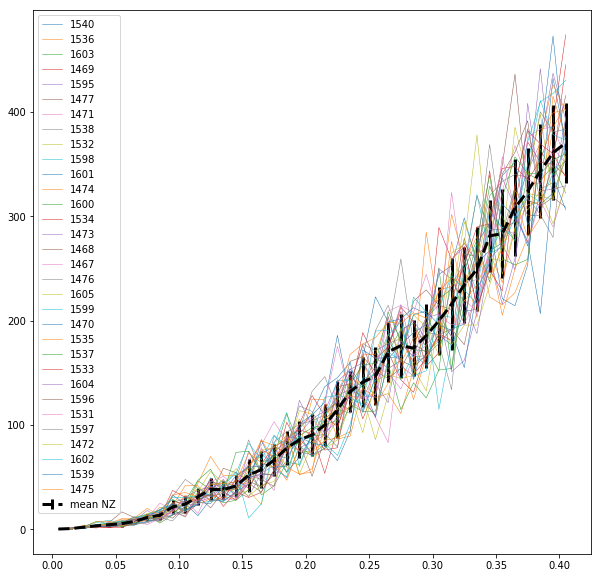

In [53]:
DZ=0.01
z_bins = n.arange(0,0.42, DZ)
z_bins_middle = z_bins[:-1]+DZ/2.
p.figure(2, (10, 10))
NZ = n.zeros((len(id_s), len(z_bins_middle)))
for ii, id_0 in enumerate(id_s):
    NZ[ii] = n.histogram(hd_AGN_all[id_0][1].data['redshift_R'], bins=z_bins)[0]
    p.plot(z_bins_middle,  NZ[ii]/area_per_pixel, label=id_0, lw=0.5)

p.errorbar(z_bins_middle,  n.mean(NZ, axis=0)/area_per_pixel, yerr=n.std(NZ, axis=0)/area_per_pixel, label='mean NZ', c='k', ls='dashed', lw=3)
#p.plot(z_bins_middle,  , label='median NZ', c='r', ls='dashed', lw=3)
    
p.legend(loc=0)


In [29]:
DF=0.2
f_bins_log = n.arange(-20, -10, DF)
f_bins = 10**f_bins_log
f_bins_middle = f_bins_log[:-1]+DF/2.
p.figure(2, (10, 10))
NFX = n.zeros((len(id_s), len(f_bins_middle)))
for ii, id_0 in enumerate(id_s):
    NFX[ii] = n.histogram(hd_AGN_all[id_0][1].data['AGN_FX_soft'], bins=f_bins)[0]
    p.plot(f_bins_middle,  NFX[ii]/area_per_pixel, label=id_0, lw=0.5)

p.errorbar(f_bins_middle,  n.mean(NFX, axis=0)/area_per_pixel, yerr=n.std(NFX, axis=0)/area_per_pixel, label='mean NFX', c='k', ls='dashed', lw=3)
#p.plot(z_bins_middle,  , label='median NZ', c='r', ls='dashed', lw=3)
p.yscale('log')    
p.legend(loc=0)


Select a sample of AGN central and satelittes and cluster
==============

Clusters : 

FX>5e-14, BCG r magnitude < 24.5

AGN : 

FX>4e-15, AGN r magnitude < 24.5 

In [31]:
id_s = hp16[hpx_ids_selection]
#n.random.shuffle(id_s)
p.figure(1, (14,10))

def get_data(id_0):
    downsample_clu = (hd_CLU[id_0][1].data['FX_soft_attenuated']>1e-13) & (hd_CLU[id_0][1].data['galaxy_mag_r']<24.5)
    ra_clu = hd_CLU[id_0][1].data['RA'][downsample_clu]
    dec_clu = hd_CLU[id_0][1].data['DEC'][downsample_clu]
    z_clu = hd_CLU[id_0][1].data['redshift_R'][downsample_clu]
    p.scatter(ra_clu, dec_clu,
            c=hd_CLU[id_0][1].data['HALO_M500c'][downsample_clu], s=hd_CLU[id_0][1].data['HALO_rvir'][downsample_clu]/10, 
              linestyle='None', rasterized=True, label=str(len(hd_CLU[id_0][1].data['RA'][downsample_clu]))+' Clusters')

    downsample_all = (hd_AGN_all[id_0][1].data['AGN_FX_soft']>4e-15) & (hd_AGN_all[id_0][1].data['AGN_SDSS_r_magnitude']<24.5)
    ra_AGN_cen = hd_AGN_all[id_0][1].data['RA'][downsample_all]
    dec_AGN_cen = hd_AGN_all[id_0][1].data['DEC'][downsample_all]
    z_AGN_cen = hd_AGN_all[id_0][1].data['redshift_R'][downsample_all]
    p.plot(hd_AGN_all[id_0][1].data['RA'][downsample_all], 
            hd_AGN_all[id_0][1].data['DEC'][downsample_all],
            marker='+', markersize=10, linestyle='None', rasterized=True, label=str(len(hd_AGN_all[id_0][1].data['DEC'][downsample_all]))+' AGN central')

    downsample_sat = (hd_AGN_sat[id_0][1].data['AGN_FX_soft']>4e-15) & (hd_AGN_sat[id_0][1].data['AGN_SDSS_r_magnitude']<24.5)
    ra_AGN_sat = hd_AGN_sat[id_0][1].data['RA'][downsample_sat]
    dec_AGN_sat = hd_AGN_sat[id_0][1].data['DEC'][downsample_sat]
    z_AGN_sat = hd_AGN_sat[id_0][1].data['redshift_R'][downsample_sat]
    p.plot(hd_AGN_sat[id_0][1].data['RA'][downsample_sat], 
            hd_AGN_sat[id_0][1].data['DEC'][downsample_sat],
            marker='x', markersize=8, linestyle='None', rasterized=True, label=str(len(hd_AGN_sat[id_0][1].data['RA'][downsample_sat]))+' AGN satellite')
    return ra_clu, dec_clu, z_clu, ra_AGN_cen, dec_AGN_cen, z_AGN_cen, ra_AGN_sat, dec_AGN_sat, z_AGN_sat
    
id_0 = id_s[0]
DATA = []
for ii, id_0 in enumerate(id_s):
    p.clf()
    DATA.append( get_data(id_0) )

ra_clu, dec_clu, z_clu, ra_AGN_cen, dec_AGN_cen, z_AGN_cen, ra_AGN_sat, dec_AGN_sat, z_AGN_sat = n.vstack((DATA)).T    

p.colorbar(label='M500c')
p.legend(loc=0)
#p.xlim((140, 220))




In [32]:
ra_clu       = n.hstack((ra_clu      ))
dec_clu      = n.hstack((dec_clu     ))
z_clu        = n.hstack((z_clu       ))
ra_AGN_cen   = n.hstack((ra_AGN_cen  ))
dec_AGN_cen  = n.hstack((dec_AGN_cen ))
z_AGN_cen    = n.hstack((z_AGN_cen   ))
ra_AGN_sat   = n.hstack((ra_AGN_sat  ))
dec_AGN_sat  = n.hstack((dec_AGN_sat ))
z_AGN_sat    = n.hstack((z_AGN_sat   ))

Counting pairs
========

In [52]:
from astropy.coordinates import SkyCoord
import scipy.spatial.ckdtree as t

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmoMD = FlatLambdaCDM(H0=67.77*u.km/u.s/u.Mpc, Om0=0.307115)#, Ob0=0.048206)
h = 0.6777
L_box = 1000.0 / h
cosmo = cosmoMD
    
z_2_DC = interp1d(n.arange(0,0.5,0.0001), cosmo.comoving_distance(n.arange(0,0.5,0.0001)))

DlogR = 0.1
bin_xi3D_log = n.arange(-1,1,DlogR)
bin_xi3D = 10** bin_xi3D_log
x_bin_xi3D_log = bin_xi3D_log[:-1]+DlogR/2.
x_bin_xi3D = 10**x_bin_xi3D_log
shell_volume = (bin_xi3D[1:]**3. - bin_xi3D[:-1]**3.)*4*n.pi/3.
print(shell_volume)

[4.16894504e-03 8.31813892e-03 1.65968691e-02 3.31151075e-02
 6.60733261e-02 1.31833618e-01 2.63042649e-01 5.24839085e-01
 1.04719165e+00 2.08942203e+00 4.16894504e+00 8.31813892e+00
 1.65968691e+01 3.31151075e+01 6.60733261e+01 1.31833618e+02
 2.63042649e+02 5.24839085e+02 1.04719165e+03]


In [47]:
def create_tree(ra, dec, redshift):
    dC = z_2_DC(redshift)
    theta = ra*n.pi/180.
    phi   = dec*n.pi/180.
    x = dC *n.sin(theta)*n.cos(phi)
    x = dC *n.sin(theta)*n.cos(phi)
    y = dC *n.sin(theta)*n.sin(phi)
    z = dC *n.cos(theta)
    treeData=t.cKDTree(n.transpose([x, y, z]),1000.0)
    nD_t1=len(treeData.data)
    return treeData


In [48]:
treeCLUSTER = create_tree(ra_clu, dec_clu, z_clu)

# AGN satellite fraction
N_AGN_cen = len(ra_AGN_cen)
N_AGN_sat = len(ra_AGN_sat)
rd_AGN_cen = n.random.random(N_AGN_cen)
rd_AGN_sat = n.random.random(N_AGN_sat)
def get_tree_agn(f_sat = 0.2):
    ra_agn = n.hstack(( ra_AGN_cen[rd_AGN_cen<1-f_sat], ra_AGN_sat[rd_AGN_sat<f_sat] ))
    dec_agn = n.hstack(( dec_AGN_cen[rd_AGN_cen<1-f_sat], dec_AGN_sat[rd_AGN_sat<f_sat] ))
    z_agn = n.hstack(( z_AGN_cen[rd_AGN_cen<1-f_sat], z_AGN_sat[rd_AGN_sat<f_sat] ))
    treeAGN = create_tree(ra_agn, dec_agn, z_agn)
    return treeAGN


In [53]:
def compute_pairs(treeCLUSTER, treeAGN):
    pairs_A_A =treeAGN.count_neighbors(treeAGN, bin_xi3D)
    pairs_A_C =treeAGN.count_neighbors(treeCLUSTER, bin_xi3D)
    pairs_C_C =treeCLUSTER.count_neighbors(treeCLUSTER, bin_xi3D)
    n_p_A_A = (pairs_A_A[1:] - pairs_A_A[:-1])/shell_volume
    n_p_A_C = (pairs_A_C[1:] - pairs_A_C[:-1])/shell_volume
    n_p_C_C = (pairs_C_C[1:] - pairs_C_C[:-1])/shell_volume
    return n_p_A_A, n_p_A_C, n_p_C_C

   

In [57]:
p.figure(1, (10,10))

n_p_A_A, n_p_A_C, n_p_C_C = compute_pairs(treeCLUSTER, get_tree_agn(0.1))
p.plot(x_bin_xi3D, n_p_C_C, label='C-C'    , lw=2, ls='dotted')
p.plot(x_bin_xi3D, n_p_A_A, label='A-A 0.1', lw=3, ls='solid')
p.plot(x_bin_xi3D, n_p_A_C, label='A-C 0.1', lw=2, ls='dashed')

n_p_A_A, n_p_A_C, n_p_C_C = compute_pairs(treeCLUSTER, get_tree_agn(0.2))
p.plot(x_bin_xi3D, n_p_A_A, label='A-A 0.3', lw=3, ls='solid')
p.plot(x_bin_xi3D, n_p_A_C, label='A-C 0.3', lw=2, ls='dashed')

n_p_A_A, n_p_A_C, n_p_C_C = compute_pairs(treeCLUSTER, get_tree_agn(0.3))
p.plot(x_bin_xi3D, n_p_A_A, label='A-A 0.4', lw=3, ls='solid')
p.plot(x_bin_xi3D, n_p_A_C, label='A-C 0.4', lw=2, ls='dashed')

n_p_A_A, n_p_A_C, n_p_C_C = compute_pairs(treeCLUSTER, get_tree_agn(0.4))
p.plot(x_bin_xi3D, n_p_A_A, label='A-A 0.4', lw=3, ls='solid')
p.plot(x_bin_xi3D, n_p_A_C, label='A-C 0.4', lw=2, ls='dashed')

p.xlabel('N pairs / volume [Mpc-3]')
p.ylabel('Separation [Mpc]')
p.xscale('log')
p.yscale('log')
p.grid()
p.legend(fontsize=16)
